In [1]:
import pandas as pd
import numpy as np
from acquire import read_or_write_csv, acquire_store
from prepare import prep_ops, prep_store
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exercises

## Using your store items data:

In [2]:
store = acquire_store()
store

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912996,2017-12-27,63,8503 NW Military Hwy,78231,San Antonio,TX
912996,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912997,2017-12-28,59,8503 NW Military Hwy,78231,San Antonio,TX
912997,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912998,2017-12-29,74,8503 NW Military Hwy,78231,San Antonio,TX
912998,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912999,2017-12-30,62,8503 NW Military Hwy,78231,San Antonio,TX


In [3]:
store.dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_date         object
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

### Convert date column to datetime format.

In [4]:
store.sale_date = pd.to_datetime(store.sale_date)
store

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912996,2017-12-27,63,8503 NW Military Hwy,78231,San Antonio,TX
912996,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912997,2017-12-28,59,8503 NW Military Hwy,78231,San Antonio,TX
912997,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912998,2017-12-29,74,8503 NW Military Hwy,78231,San Antonio,TX
912998,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912999,2017-12-30,62,8503 NW Military Hwy,78231,San Antonio,TX


### Plot the distribution of sale_amount and item_price.

<Axes: xlabel='sale_amount', ylabel='Count'>

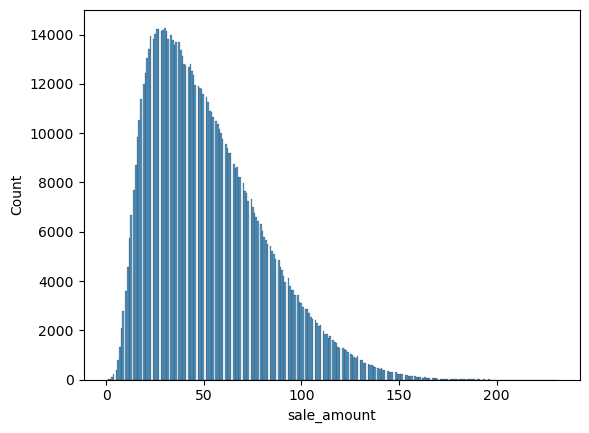

In [5]:
sns.histplot(data=store, x='sale_amount')

<Axes: xlabel='item_price', ylabel='Count'>

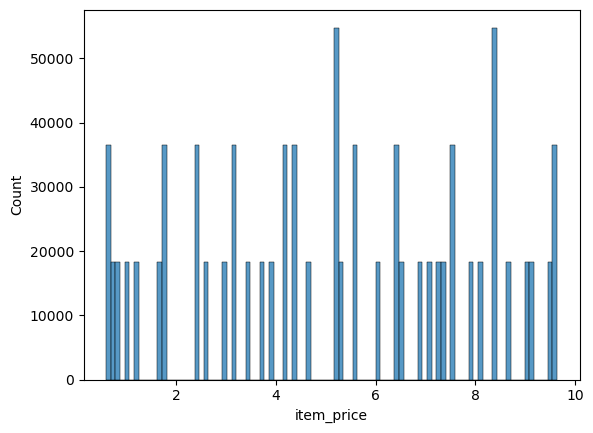

In [6]:
sns.histplot(data=store, x='item_price')

### Set the index to be the datetime variable.

In [7]:
store = store.set_index('sale_date').sort_index()
store

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX


### Add a 'month' and 'day of week' column to your dataframe.

In [8]:
store['month'] = store.index.month_name()
store['day_of_week'] = store.index.day_of_week
store

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,1
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,1
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [9]:
store['sales_total'] = (store['sale_amount'] * store['item_price'])
store

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,1,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,1,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6,279.62
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6,13.20
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6,106.78


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [10]:
new_store = prep_store()
new_store

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,1,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,1,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6,279.62
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6,13.20
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,6,106.78


# This one for now

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [11]:
ops = read_or_write_csv('opsd.csv')
ops

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [12]:
ops.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [13]:
ops.columns = ops.columns.str.lower()
ops = ops.rename(columns= {'wind+solar':'wind_and_solar'})
ops

,date,consumption,wind,solar,wind_and_solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


### Convert date column to datetime format.

In [14]:
ops.date = pd.to_datetime(ops.date)
ops.dtypes

date              datetime64[ns]
consumption              float64
wind                     float64
solar                    float64
wind_and_solar           float64
dtype: object

### Plot the distribution of each of your variables.

<Axes: xlabel='consumption', ylabel='Count'>

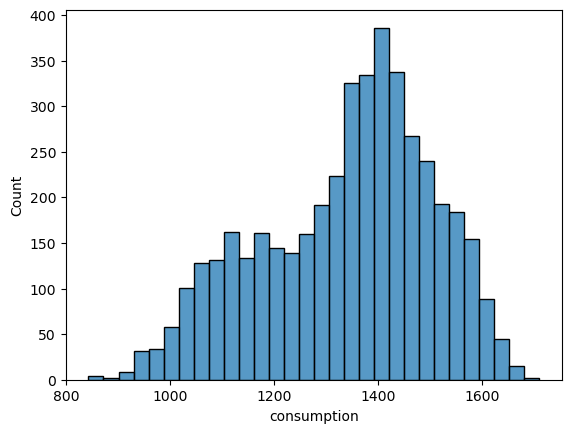

In [15]:
sns.histplot(data=ops, x='consumption')

<Axes: xlabel='wind', ylabel='Count'>

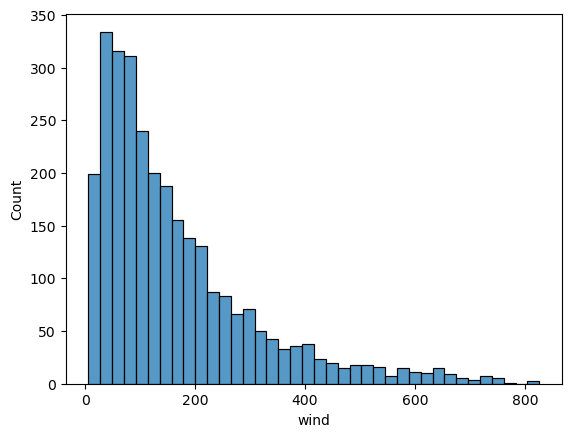

In [16]:
sns.histplot(data=ops, x='wind')

<Axes: xlabel='solar', ylabel='Count'>

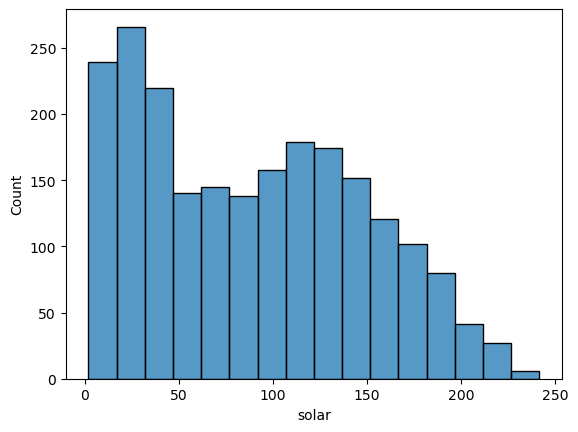

In [17]:
sns.histplot(data=ops, x='solar')

<Axes: xlabel='wind_and_solar', ylabel='Count'>

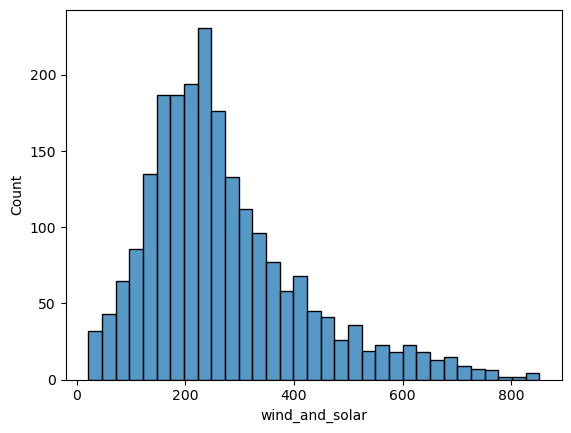

In [18]:
sns.histplot(data=ops, x='wind_and_solar')

### Set the index to be the datetime variable.

In [19]:
ops = ops.set_index('date').sort_index()
ops

,consumption,wind,solar,wind_and_solar
date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


### Add a month and a year column to your dataframe.

In [20]:
ops['month'] = ops.index.month_name()
ops

,consumption,wind,solar,wind_and_solar,month
date,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January
2006-01-02,1380.52100,NaN,NaN,NaN,January
2006-01-03,1442.53300,NaN,NaN,NaN,January
2006-01-04,1457.21700,NaN,NaN,NaN,January
2006-01-05,1477.13100,NaN,NaN,NaN,January
...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December
2017-12-28,1299.86398,506.424,14.162,520.586,December
2017-12-29,1295.08753,584.277,29.854,614.131,December


In [21]:
ops['year'] = ops.index.year
ops

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


### Fill any missing values.

In [22]:
ops.isna().sum()

consumption          0
wind              1463
solar             2195
wind_and_solar    2196
month                0
year                 0
dtype: int64

In [23]:
ops.solar[ops.solar.isnull()] = 0
ops.wind[ops.wind.isnull()] = 0
ops.wind_and_solar = ops['wind'] + ops['solar']
ops.wind_and_solar[ops.wind_and_solar.isnull()] = 0
ops

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [24]:
ops.isnull().sum()

consumption       0
wind              0
solar             0
wind_and_solar    0
month             0
year              0
dtype: int64

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [25]:
new_ops = prep_ops()
new_ops

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017
